In [1]:
%load_ext autoreload
%autoreload 2

from perturbations import *
from representation import *
from ls import *
import jupyter_utils as utils

import numpy as np
import matplotlib.pyplot as plt
import tsplib95

In [3]:
# generate the problem instance
n = 30  # number of cities
distance_matrix = random_distances(n)

print("Generated distances between cities:")
fitness = fitness_wrapper(distance_matrix)

Generated distances between cities:


In [5]:
# load problem from the library
problem = tsplib95.load("./archives/bayg29.tsp/bayg29.tsp")
#  ./archives/bayg29.tsp/bayg29.tsp
n = problem.dimension
distance_matrix = utils.weights_to_matrix(problem.edge_weights)
print("size of matrix: ", n)
# best = 1610
fitness = fitness_wrapper(distance_matrix)

size of matrix:  29


In [24]:
perturbation = perturb_invert
#           perturb_move
#           perturb_invert
#           perturb_switch

ls = ls_first_improvement

# init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
init_fn = constructive_heuristics_init_wrapper(size=n, dist_matrix=distance_matrix)
#           random_init_wrapper(size=n)
#           better_init_wrapper(size=n,dist_matrix = distance_matrix)


max_evals = 000

# do the search here!

results = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_fn=perturbation,
    stop_cond=max_evals,
)


# separate and print results!


best_fitness = results["best_fitness"]


best_order = results["best_order"]


history = results["history"]


utils.print_results(results)

Best solution found:
[28, 25, 4, 8, 5, 11, 27, 0, 23, 26, 7, 15, 12, 9, 19, 1, 20, 3, 14, 18, 24, 6, 22, 10, 21, 13, 17, 16, 2]
With fitness:  1952.0
Total steps taken:  0


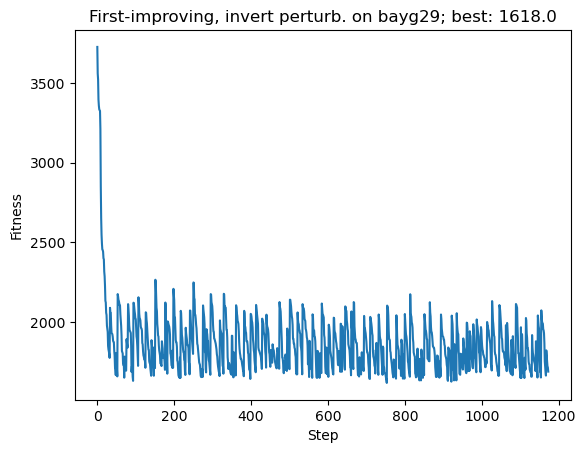

In [77]:
fitness_list = [iteration["fitness"] for iteration in history]
utils.simple_graph(
    fitness_list,
    "Step",
    "Fitness",
    f"First-improving, invert perturb. on bayg29; best: {best_fitness}",
)

### ls - try all permutations, select best for the next step

In [74]:
# parallel versions compute all possible permutations in every step

perturbation = invert_subseq
#           switch_cities
#           move_cities
#           invert_subseq

ls = ls_best_improvement
init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)

max_steps = 150_000
# do the search here!


results = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_operation=perturbation,
    stop_cond=max_steps,
)


# separate and print results!


best_fitness = results["best_fitness"]


best_order = results["best_order"]


history = results["history"]


utils.print_results(results)

Best solution found:
[24 18 10 21 16 13 17 14  3  9 19  1 20  4 28  2 25  8 11  5 27  0  7 23
 12 15 26 22  6]
With fitness:  1615.0
Total steps taken:  1021


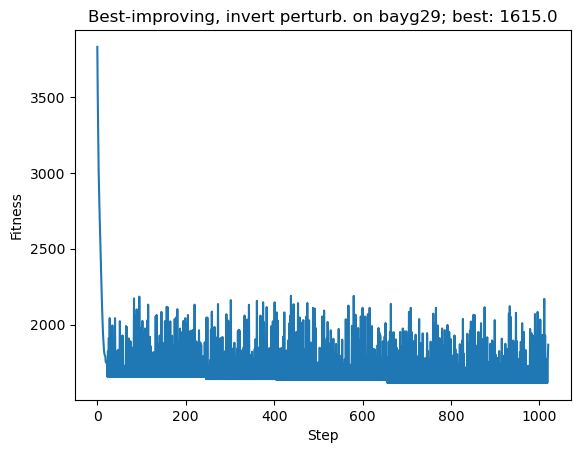

restarted:  520


In [75]:
fitness_list = [iteration["fitness"] for iteration in history]
utils.simple_graph(
    fitness_list,
    "Step",
    "Fitness",
    f"Best-improving, invert perturb. on bayg29; best: {best_fitness}",
)
restarts = [iteration["restart here"] for iteration in history]
num_restarts = sum(restarts)
print("restarted: ", num_restarts)